
# Homework 4: Confidence intervals, hypothesis testing, and p-values
***

**Name**: Jeremy M. Hein

***

This assignment is due on Moodle by **11:59 PM on Friday 3 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 


In [2]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

<br>


### [20 points] Problem 1 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ (location) and $\beta=2$ (scale).  Be sure to leave this cell executed before turning in your assignment! Make your histogram faces coral with gray edges.

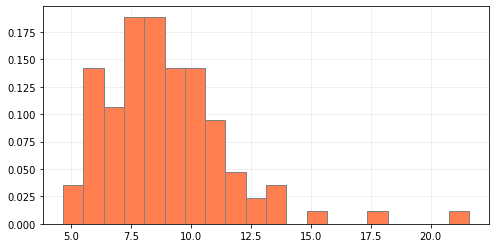

In [19]:
mu = 8
beta = 2
n_sample = 100
x = stats.gumbel_r.rvs(mu, beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

pd.Series(x).hist(ax=ax, bins=20, color="coral", density=True, edgecolor="grey")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

In [20]:
#print emperical mean and Euler's number for part B
print(np.mean(x))
print(np.euler_gamma)

8.952184589291361
0.5772156649015329


**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. Note that the version of the Gumbel we are using is *right-skewed*, and is the version used to model maximal extreme events.

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

In [32]:
# Get the true mean and variance of the distribution 
mean, var, skew, kurt = stats.gumbel_r.stats(mu, beta, moments='mvsk')
print (var)
print (mean)
print (skew)
print (kurt)

6.579736267392906
9.154431329803066
1.1395470994046486
2.4


Analytical mean and variance for the Gumbel distribution are as follows:

$\mu = \alpha + \lambda\beta$ where $\alpha$ is the location parameter, $\lambda$ is the Euler-Mascheroni constant, and $\beta$ is the scale parameter.

$\sigma^{2} = \left(\frac{1}{6}\right)\pi^{2}\beta^{2}$ where $\beta$ is the scale parameter.

So, 

$\mu = 8 + 0.5572156649015329\left(2\right) = ~9.1144$

$\sigma^{2} = \left(\frac{1}{6}\right)\pi^{2}\left(4\right) = \frac{2\pi^{2}}{3} = ~6.5797$

We can calculate the 95% confidence interval by the formula:

$[\bar{x} - \left(1.96\right)\left(\frac{\sigma}{\sqrt{n}}\right), \bar{x} + \left(1.96\right)\left(\frac{\sigma}{\sqrt{n}}\right)]$

Our empirical mean is ~8.9535 from our sample in part A, and $\sigma = \sqrt{\sigma^{2}} = \sqrt{6.579736267392906} = ~2.56501$. So:

$[8.9535 - \left(1.96\right)\left(\frac{2.56501}{\sqrt{100}}\right), 8.9535 + \left(1.96\right)\left(\frac{2.56501}{\sqrt{100}}\right)] = [8.45075804, 9.45624196]$


**Part C:  A theoretical interlude.** When Amy, the famous hedgehog data scientist, ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** If we sample 100 random variables from the $Gum(\mu=8, \beta=2)$ distribution, then roughly 95% of them will be between 8.81 and 9.82.

**Responses:**

**(i)** This is an incorrect interpretation.  What we could say is that if we ran this 100 times, we would expect 95% of the confidence intervals we calculated to inclue the true mean.

**(ii)** This is an correct interpretation.  See response to part i.

**(iii)** This is an incorrect interpretation.  We can see from our own dataset in Part A that 95% of our random variables do not fall within the CI range.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know the variance for the true population distribution, $\sigma^2$ from Part B.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals steelblue if they cover the true mean, and coral if they don't.  

Be sure to leave this cell executed before turning in your assignment!

326
0.652


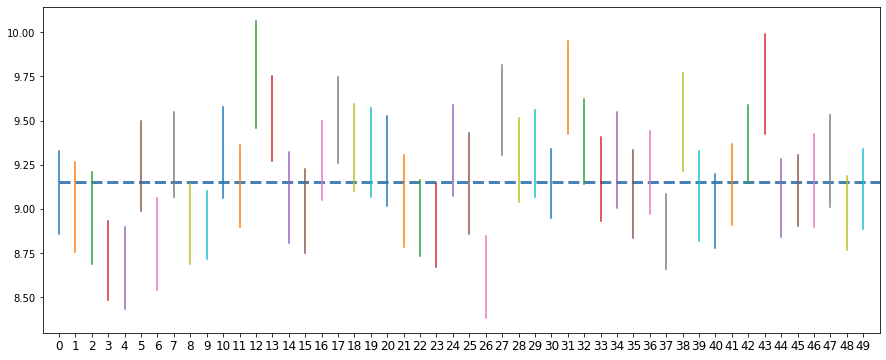

In [73]:
# GIVEN CODE:

def confidence_intervals(m, n):
    mu = 8
    beta = 2
    alpha = 0.34
    count = 0
    plaxis = 0
    
    my_list = list(range(1,500)) # list of integers from 1 to 500                           
    random.shuffle(my_list) #shuffle list
    
    # Get true stats of distribution
    mean, var, skew, kurt = stats.gumbel_r.stats(mu, beta, moments='mvsk')
    
    # Set up plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
    ax.plot([0,50], [mean, mean], color="steelblue", ls='--', lw=3)
    
    #run 500 calcs
    for sId in range(m):
        x = stats.gumbel_r.rvs(mu, beta, size=n) #sample size of 100 per iteration
        xbar = np.mean(x) 
        z_alpha = stats.norm.ppf(1-(0.34/2))
        SE = np.std(x)/np.sqrt(n)
        CImin = xbar-z_alpha*SE 
        CImax = xbar+z_alpha*SE
        for i in range(50): # if sId == one of first 50 numbers in shuffled list - plot onto graph
            if sId == my_list[i]:
                ax.plot([plaxis, plaxis], [CImin, CImax]) # plot interval
                plaxis += 1  #increment axis counter
        if mean > CImin and mean < CImax: # count if mean is within CI
            count += 1
            

    ax.set_xlim([-1,50])
    plt.xticks(range(50), fontsize=12)
    print(count)
    print(count/m)
        
confidence_intervals(m=500, n=100)

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

Yes, it does.  With a confidence internal of 66%, we would expect rougly 66% of the CIs that were calculated to contain the true mean.  We can see from our data that this is indeed the case.

---


### [20 points] Problem 2 - Taco Town!!

You're an intern in the office of the City of Boulder's official Food Rater, and in order to support her in her extremely important job, you have to determine whether Taco Bell or Del Taco has the empirically better tacos. 

"Don't worry," you tell your boss. "I'll have you know I graduated top of my class from CU Boulder, and I've been involved in numerous data science operations on difficult data sets - many of which are hedgehog-related - and I have over 300 confirmed confidence intervals. I am trained in Numpy and Pandas and I'm the top data scientist in the entire campus."

"Weird flex but OK," your boss responds, and gives you the data. The data set consists of 100 diners who ate both Taco Bell and Del Taco, and rated their meal enjoyment at each. As is often the case with fast food taco establishments, each diner ate alone and each meal was followed by about 3 weeks of intense therapy, so the diners and meals may all be considered to be independent of one another. The meal enjoyment ratings are in units of *mehs*, where lower values denote more disgust and a worse meal, and higher values are better.

**Part A:** Import the data set `taco_time.csv` as a Pandas DataFrame.

Then, plot a density histogram of the data. Include both Taco Bell and Del Taco on the same set of axes. Be sure to label your axes, and make the histogram faces slightly transparent and include a legend, so we can tell the two data sets apart. Use colors for each restaurant that are representative of that restaurant's logo or branding.

Finally, formulate a hypothesis about which restaurant has the higher mean meal enjoyment.

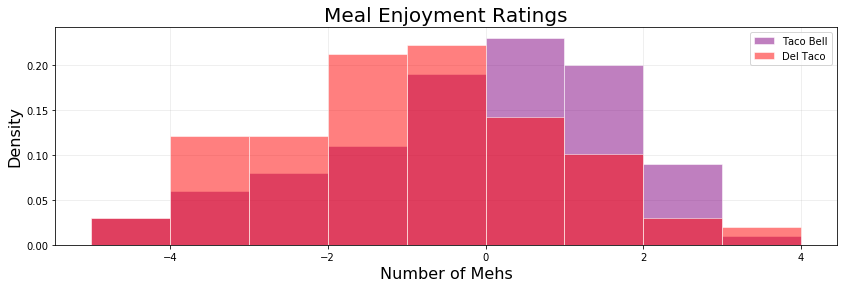

In [4]:
file_path = "C:/Users/jerem/OneDrive/Documents/CSCI3022/taco_time.csv"
df = pd.read_csv(file_path)
df = df.drop(columns = ['Unnamed: 0'])

dfTbell = df['Taco Bell']
dfDtaco = df['Del Taco']

my_bins = range(-5,5,1)
# Initialize figure 
fig, ax = plt.subplots(figsize=(14,4))

# Plot histogram with custom colors and adding density
mycolor = np.array([30,30,120])/255 #RGB values
dfTbell.hist(ax=ax, alpha = 0.5, bins=my_bins, facecolor="purple", edgecolor="white", density = True, label = "Taco Bell")
dfDtaco.hist(ax=ax, alpha = 0.5, bins=my_bins, facecolor="red", edgecolor="white", density = True, label = "Del Taco")

# Add a title
ax.set_title("Meal Enjoyment Ratings", fontsize=20)

# Add axis labels 
ax.set_xlabel("Number of Mehs", fontsize=16)
ax.set_ylabel("Density", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

# Add legend
ax.legend(loc = 'upper right')

We can see from our histogram that Taco Bell has a higer density of positive ratings as compared to Del Taco.  Therefore, I hypothesize that Taco Bell has the higer mean enjoyment rating.

**Part B:** Compute a 95% confidence interval for the mean enjoyment of Taco Bell meals, and a separate 95% confidence interval for the mean enjoyment of Del Taco meals. You can use Python as a calculator, but the set-up and groundwork for your computation should be in Markdown/MathJax.

Based on those confidence intervals, can we conclude that the means are different at the 95% level of confidence?

**Solution:**

Since our events can be considered independent and all are pulled from the same distribution, we can use the true normal distribution variance in our calculation of the confidence intervals.  Therefore, our calculations can follow the formula:

$[\bar{x} - \left(1.96\right)\left(\frac{\sigma}{\sqrt{n}}\right), \bar{x} + \left(1.96\right)\left(\frac{\sigma}{\sqrt{n}}\right)]$

Where $\bar{x}$ are our sample means and n is our number of ratings (100).

In [5]:
#calculate sample means
xbarTbell = dfTbell.mean(axis=0)
xbarDtaco = dfDtaco.mean(axis=0)
tBellstdv = dfTbell.std(axis=0)
dTacostdv = dfDtaco.std(axis=0)

z_alpha = stats.norm.ppf(1-(0.05/2)) #95% confidence interval

SEtbell = tBellstdv/np.sqrt(100)
SEdtaco = dTacostdv/np.sqrt(100)

CItbellMin = xbarTbell - z_alpha*SEtbell
CItbellMax = xbarTbell + z_alpha*SEtbell
CIdtacoMin = xbarDtaco - z_alpha*SEdtaco
CIdtacoMax = xbarDtaco + z_alpha*SEdtaco

print(CItbellMin, ", ", CItbellMax)
print(CIdtacoMin, ", ", CIdtacoMax)

-0.48265538515245887 ,  0.25527172993245906
-1.208631756982056 ,  -0.4600626352979447


Note that the confidence interval only tells us that if we were to run this 100 times, we would expect that 95 of our CI's would inclue the true mean, and 5 would not.  Since there is a small amount of overlap in our confidence intervals and we have only run our experiment once, it is still possible that the means equal each other at the 95% level of confidence. Given the interval for Taco Bell is significantly greater than Del Taco, we may suspect that the mean enjoyment rating for Taco Bell is higher but we can't say it for certain.  

**Part C:** Compute a 95% confidence interval for the difference between the mean enjoyment of Taco Bell and Del Taco food. 

We can use the following formual to compute a 95% confidence interval for the difference between the two sets.

$[\left(\bar{x} - \bar{y}\right) +- \left(1.96\right)\left(\sqrt{\frac{SD1}{n} + \frac{SD2}{n}}\right)]$

In [6]:
xbardiff = xbarTbell - xbarDtaco
SEdiff = np.sqrt((tBellstdv/100) + (dTacostdv/100))

diffMin = xbardiff - z_alpha*SEdiff
diffMax = xbardiff + z_alpha*SEdiff

print(diffMin, ", ", diffMax)

0.3389827937213286 ,  1.1023279433386721


**Part D:** Comment on how the results from this two-sample confidence interval compare to the results from the separate one-sample confidence intervals. In 1-2 sentences, discuss how these results confirm, disprove, or otherwise relate to your hypothesis from Part A.

The two-sample confidence interval confirms our suspicision that Taco Bell's mean enjoyment rating is higher than Del Taco's.  We can see that the interval does not contain 0 and is positive, which indicates that Taco Bell's mean enjoyment rating is [0.339 - 1.102] meh's greater than Del Taco's with a confidence interval of 95%.

---


### [20 points] Problem 3 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas DataFrame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly, based on what represents a separation between two columns of data.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [38]:
dfMPG = pd.read_csv('auto-mpg.data', delim_whitespace=True) # read file w/ delim whitespace
dfMPG.columns =['MPG', 'Cylinders', 'Displacement','Horsepower', 'Weight', 'Acceleration', 'Year', 'Origin', 'Name'] #set column names

#replace ? values with NaN - then drop na
dfMPG = dfMPG.replace({'?': np.nan})
dfMPG = dfMPG.dropna(how='any')
dfMPG

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 90% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

In [3]:
n = 16
xbar = 743
stdv = 5
z_alpha = stats.norm.ppf(1-(0.05/2)) #get 90% z-value
SE = stdv/np.sqrt(n)

CImin = xbar - z_alpha*SE #calculate min
CImax = xbar + z_alpha*SE #calculate max

print(CImin, ", ", CImax) #print CI

740.5500450193249 ,  745.4499549806751


Based on our data, we could say that 90% of random samples of 391 vehicles from the 1970-1983 time period will yield CI's that contain the true MPG mean. We cannont say for certain that our CI of [22.81, 24.11] contains the true mean, and thus cannot definitively state that our mean gas milage is greater than 20 mpg. 

**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Using an appropriate *hypothesis test*, can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

**Hypothesis Setup**

Null Hypothesis $(H_{0})$ = The mean gas milage of vechciles with 4 or 6 cylinder engines is not more than 10mpg better than those with 8 cylinder engines

Alternative Hypothesis $(H_{1})$ = The mean gas milage of vechciles with 4 or 6 cylinder engines is more than 10mpg better than those with 8 cylinder engines

The sample mean gas milage for 8 cylinder vehicles is 14.933, so we will say that for $(H_{0})$, M = 24.933
Our alternative hypothesis will be M > 24.933

Test Statistic: Mean gas mileage

Significance Level: 99%

In [57]:
#first pull subsets of data we need for computations
df8 = dfMPG.loc[dfMPG['Cylinders'] == 8]
df64 = dfMPG.loc[(dfMPG['Cylinders'] >= 4) & (dfMPG['Cylinders'] <= 6)]

#now calculate xbar of 8 cylinder vechiles
xbar8 = df8["MPG"].mean() #note this is equal to 14.933

#now get our z-critial value
z_critical = stats.norm.ppf(1-(0.01/2)) #get 99% z-value

#get xbar of 4-6 cylinder vehicles
xbar64 = df64["MPG"].mean() #note 26.552

#now calculate z-test 

z_test = ((xbar64 - (xbar8 + 10))/SE)  #note stdv/np.sqrt(n) calculated in part B

if z_test > z_critical:
    print("We can reject the null hypothesis and conclue that on average, vehicles with 4 or 6 cylinder engines are more than 10pmg better than those with 8 cylinder engines.")
else:
    print("We cannot reject the null hypothesis and conclue that on average, vehicles with 4 or 6 cylinder engines are more than 10pmg better than those with 8 cylinder engines.")


We can reject the null hypothesis and conclue that on average, vehicles with 4 or 6 cylinder engines are more than 10pmg better than those with 8 cylinder engines.


---


### [20 points] Problem 4 - Grab bag!



<img src="http://blog.localditch.com/wp-content/uploads/2011/01/sonic4.jpg" style="width: 400px;"/>

**Part A**: You work for an engineering firm that has been hired to construct a corkscrew-shaped looped path for hedgehogs to run on and collect gold rings. Thousands of hedgehogs will run along this path each day, so structural failure means injury or death for many wonderful little creatures. 

You are in charge of quality control for the average strength of carbon fiber that will be used to construct the corkscrew path. Thinking back fondly to your days in CSCI 3022, you set up a hypothesis test in which your alternative hypothesis is that the strength of the carbon fiber is below tolerance, and therefore unsafe. What is the null hypothesis? Would you rather have a low Type I error rate or a low Type II error rate? Explain.

**Resonse:**

The null hypothesis in this case would be that the strength of the carbon fiber is at or above tolerance, and therefore safe.  A Type I error is rejecting the null when the null is true, and a Type II error is failing to reject the null when the null is false.  In this case, if we have a Type II error, we would deem the corkscrew path to be safe when in reality it isn't. If we have a Type I error we deem the corkscrew path to be unsafe when in reality it is safe.  I would rather have a low Type II error rate, as we certainly wouldn't want to tell the hedgehogs that the path is safe when it really isn't!

**Part B**: Amy, the famous hedgehog data scientist, is working for the same engineering firm as you. She is a legend around the office! Word around the water cooler is that out of all of the 95% confidence intervals that Amy has constructed, 931 of them have turned out to actually capture the true population mean. Since Amy is a data science wizard and you can be sure she is constructing her confidence intervals correctly and collecting and using her data honestly, about how many 95% confidence intervals would you expect her to have constructed total? Explain your reasoning fully with words as well as some math.

**Response:**

If 931 of Amy's CIs actually capture the true population mean, we would expect that 931 accounts for 95% of the total CIs she has constructed (given the 95% confidence interval).  Therefore we would expect to see 931 = (0.95)total.

= 931 / 0.95 = 980 total CIs constructed.

**Part C**: As part of an outreach program, you and Amy are visiting a local elementary school to talk to the students about data science. What a riot! One of the more astute students asks you a question: "In general, which is wider: a 95% confidence interval or a 99% confidence interval?"

How would you explain this to these young students, who are not fluent in any kind of science? (So, for example, spouting off theory and words like "mean" and "z critical value" probably won't mean anything to them.)

**Response:**

I would explain that in general the greater the confidence, the wider the range.  This is because as we increase the range of our possible values, we can be more confident the value we are looking for is in that range.

As an example, I could ask them to pick a number at random.  How confident am I that the number they picked is between 1 and 5?  How about between 1 and 100? Or 1 and 1,000,000?  It's easy to see that the greater my range is, the more confident I can be that their number is within that range.

**Part D:** You observe a sample of 73 pygmy hedgehogs and find that 49 of them are fantastic pets. Then, you observe a sample of 58 long-eared hedgehogs and find that 51 of them are fantastic pets.

Is there statistical evidence at the 0.05 significance level that the true proportion of long-eared hedgehogs that make fantastic pets is 10% higher than the true proportion of pygmy hedgehogs that make fantastic pets? Perform a test that computes and properly interprets a p-value.

**Part E**: Let $X$ be a normally-distributed random variable representing the difficulty of a homework problem in CSCI 3022. You draw from it more times than you care to count during the Spring 2019 semester and get the following values, stored in the numpy array **toughness**, below. Compute a 90% confidence interval for the _standard deviation_ in problem toughness.

In [ ]:
toughness = np.array([7.7778,6.9459,5.8248,9.1111,6.0180,5.0898,7.0380,8.9273,2.9614,5.8387,6.0231])

---

<a id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5 - Lies, damned lies, and statistics

![frazz](http://3.bp.blogspot.com/-SbQUWRfHFXk/VdN8YWAy0WI/AAAAAAAAJLw/Ij5E0CbYk6g/s1600/lies3.gif)

Legend of your Data Science prowess has spread o'er the land. You have been contacted by a shadowy organization to assess whether there is statistical evidence for sea-level rise in the area of Key West, Florida. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file included in the zip folder for this assignment. The columns are, in order, the year, month, day-of-month and measured sea level (in millimeters).

**Part A:** Load the data `sealevel_keywest.csv` into a Pandas DataFrame. Rename the columns as something meaningful in the context of this problem. Print to the screen the first 7 rows from your updated DataFrame.

**Part B:**  Plot the raw time series of sea levels. Be sure to label your axes, including units. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

**Part C:** Your time series plot from Part B should look pretty funky. Namely, there are a bunch of spikes in it! What do you think these spikes represent?

Now, clean your data set by doing the following:
* Remove any data points associated with these spikes. You may need to look back to some of the earlier in-class notebooks and Pandas tutorials for how to drop data points from a Pandas DataFrame. 
* Include only the data point from the second day of each month.
* Convert the sea-level data from millimeters to feet.

Then, make a similar plot to Part B, but of your cleaned data set. Be sure to label axes (including units) and only label January 2 of each year that is divisible by 10.

**Part D:** Your mysterious employer owns a lot of beachfront property in Key West and does not want to see people shy away from buying real estate and spending time near the sea. So, they really want to convince others to that the mean sea level in Key West in not increasing. Toward this end, your employer wants to find a decade of data (11 years, including both end points) that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010 (including data from both 2000 and 2010). Your employer wants you to use the 99% confidence/1% significance level because it sounds catchy in a press release, and wants the *earliest* decade possible.

Use your cleaned monthly data set from Part C to find the earliest decade for which you cannot conclude the mean sea level at Key West was statistically significantly different from the mean sea level in the 2000-2010 decade. You may want to write a helper function to compute the confidence intervals/perform the hypothesis test for you, because there are a LOT of possible 11-year periods to try.

You may use either hypothesis tests or confidence intervals, but clearly state which method you will use, your results and show all work that leads to your conclusion. 